# D208 Predictive Modeling

In [165]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import pprint
pp = pprint.PrettyPrinter(indent=4)

## Part I: Research Question

## A1. Research Question
**Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple linear regression in the initial model.**

My research question is: what are contributing factors related to a patient's length of stay? At a higher level, what variables directly influence the 'initial days' a patient stays in a hospital?

## B2. Goals of the Data Analysis. 
**Note: Ensure that your goals are within the scope of your research question and are represented in the available data.**

The goal of the data analysis is to discover which factors influence a patient's length of stay. By uncovering which variables are correlated, whether it be patient demographics, hospital procedures or similar details, medical hospitals can utilize these findings in multiple different way such as improving patient care through better practices. Examples of improving patient care include identifying the higher risk patients (those likely to have longer stays) to possibly come up with more targeted interventions and preventative care measures. As a result of the previously mentioned benefit, hospital resources may be more optimally allocated, resulting in quick patient turnover and reduced overall medical costs for both patients and medical centers.


## Part II: Method Justification

B.  Describe multiple linear regression methods by doing the following:

### B1.  Summarize four assumptions of a multiple linear regression model.
Multiple linear regression relies on four main assumptions. These four assumptions are **linearity, independence, homoscedasticity, and normality**.

Linearity is defined as an existing linear relationship between the dependent and independent variables. Any change applied to an independent variable will effect the dependent variable linearly. A simpler way to explain this is an existing "straight line relationship between two variables" (Investopedia Linear Relationship Definition, Formula, and Examples).

Independence is defined as the residuals being independent. Residuals are also known as the error, which is the difference between a predicted value and actual value $(y-\hat{y})$. Independence among residuals implies there is no correlation between residuals. In summary, the residuals are ***normally distributed***.

Furthermore on the subject of residuals, Homoscedasticity is defined as the variance of residuals remaining constant across all independent values. A good visual would be visualizing a scatterplot with the regression line and plotted residuals. In the case of homoscedascticity, the residuals should have similar variance from their respective predicted values. In contrast, heterosceascticity would not have a constant variance among the residuals, resulting in patterns such as cone-shapes, u-shapes, etc.. (Homoscedasticity - Statistics Solutions)

Normality -- ADD HERE


### B2.  Describe two benefits of using Python or R in support of various phases of the analysis.

Python is my choice of programming language due to it's ease of use and robust use in data science. Python has many versatile libraries including numpy (numerical python operations), pandas (used for manipulation of dataframes), scipy (used for statistical operations), and matplotlib and seaborn (strong versatile visualization packages).

During the wrangling phase, Python's pandas library proves to be incredibly useful for the manipulation of dataframes, including cleaning, transforming and creating new features. Numpy is also an analyst favorite with its' powerful performance with numerical operations on arrays, which is synonymical to dataframes.

Data exploration and statistics phases also greatly benefits from the various functions within Python. The visual libraries including matplotlib and seaborn has versatile graphs that provide easy access to quick insights. Distribution charts, scatterplots and heatmaps are a few of my most used functions that help me assess the distribution and relative relation to features within the dataset. This results in decreased need for computing power as well as reduction in redundancy.

### B3.  Explain why multiple linear regression is an appropriate technique to use for analyzing the research question summarized in part I.

This technique is an algorithm used for modeling the relationship between independent feature variables and the predictor variable. In this case, the research question dependent variable is length of stay. Multiple linear regression is an appropriate algorithm for use in predicting a variable considered to be (or used as) continuous.


This is suitable for the research question because it not only allows for simultaneous research of variables that influence a patient's length of stay, (e.g. a combination of patient characteristics, health conditions and lifestyle) it allows for a deep dive into what feature variables may be associated to a patient's stay in a hospital. By quantifying the relationships between patient demographics, hospital stay information etc. this technique offers valuable insights into the range of correlation the independent and predictor variable may have. 


Furthermore, the benefits of this technique allows one to see the direct interaction between each variable and how the direct influence each other. An example could be diabetes is much more pronounced in patients in certain cities.

## Part III. Data Cleaning/Preparation

 Summarize the data preparation process for multiple linear regression analysis by doing the following:

### **C1.** Describe data cleaning goals/steps.

`Describe your data cleaning goals and the steps used to clean the data to achieve the goals that align with your research question including your annotated code.`

Similarly to my previous data cleaning method from D206, my plan is to assess and clean the dataframe where necessary. Firstly, I assess the different data types of each column and change each accordingly to int, float, bool etc. as needed. Next, I assess any duplicates or nulls and handle those by either dropping, separating or imputing. In this case, the dataset is free of duplicates and nulls. My next step is identifying outliers and making a plan on whether they will be separated, dropped or imputed. Lastly I take a thorough look into all of the data and entries to be sure everything makes sense. This step can include spelling, correcting typos and lower casing items to make them more readable.

To clean the dataset, I will start by making sure all zip codes are a minimum five digits by adding zeros at where needed, correcting data loss from the column previously being set as an integer. I will standardize the timezone column to fit the nine main time zones and then change to a the appropriate categorical data type.

Columns like readmission, soft_drink, and various health-related columns that have yes/no or 1, 0 answers will be changed to boolean data types. I will also round values in columns: vitd_levels, total_charge, and additional_charges to two decimal places. Columns like population, children, and income will be corrected to integer from float types.

Columns such as marital, gender, and other service related columns will be set as categorical data types. Other columns like income appear within reasonable bounds and thus I decided on no further changes with regards to data imputation.

In [7]:
# bring in dataframe
df = pd.read_csv('medical_raw_df.csv', index_col=[0])
# lowercase columns
df.columns = map(str.lower, df.columns)

# # fill nulls first so there are no issues when changing datatypes
# mode = ['children', 'overweight', 'anxiety']
# mean = ['age']
# median = ['income', 'initial_days']
# for col in mode:
#     df[col].fillna(df[col].mode()[0], inplace=True)
# for col in mean:
#     df[col].fillna(df[col].mean(), inplace=True)
# for col in median:
#     df[col].fillna(df[col].median(), inplace=True)

# verify no nulls
assert df.isnull().sum().sum() == 0
# verify no duplicates
assert df.duplicated().sum() == 0

    
# change timezone column entries before changing data type
tz_dict = {
    "America/Puerto_Rico" : "US - Puerto Rico",
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    "America/Phoenix" : "US - Arizona",
    "America/Los_Angeles" : "US - Pacific",
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    "America/Adak" : "US - Aleutian",
    "Pacific/Honolulu" : 'US - Hawaiian'
    }
df.timezone.replace(tz_dict, inplace=True)

# convert zip column to str, then fill 0s in entries
df.zip = df.zip.astype('str').str.zfill(5)

# changing datatypes
# change columns to boolean data type
to_bool = ['readmis',
           'soft_drink',
           'highblood',
           'stroke',
           'overweight',
           'arthritis',
           'diabetes',
           'hyperlipidemia',
           'backpain',
           'anxiety',
           'allergic_rhinitis',
           'reflux_esophagitis',
           'asthma']

for col in to_bool:
    df[col] = df[col].replace({'Yes':1, 'No':0}).astype(bool)


# round entries in columns to only have two decimal places
round_num = ['vitd_levels',
             'totalcharge',
             'additional_charges']
for col in round_num:
    df[col] = round(df[col], 2)

# change columns to integer data type
to_int = ['population',
          'children',
          'age',
          'income',
          'initial_days']
for col in to_int:
    df[col] = df[col].astype('int32')

# change columns to categorical data type
to_cat = ['marital',
          'gender',
          'initial_admin',
          'services',
          'item1',
          'item2',
          'item3',
          'item4',
          'item5', 
          'item6',
          'item7',
          'item8',
          'timezone',
          'state',
          'complication_risk']
for col in to_cat:
    df[col] = df[col].astype('category')
      
# make columns more readable  
columns = {'caseorder':'case_order',
          'uid':'unique_id',
          'readmis':'readmission',
          'vitd_supp':'vitd_supplement',
          'highblood':'high_blood',
          'services':'services_received',
          'totalcharge':'total_charges'}


df.rename(columns=columns, inplace=True)

In [8]:
df.head()

,customer_id,interaction,unique_id,city,state,county,zip,lat,lng,population,...,total_charges,additional_charges,item1,item2,item3,item4,item5,item6,item7,item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.70,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.19,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.23,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.83,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.07,3716.53,2,1,3,3,5,3,4,3


In [9]:
# verify datatypes were changed accordingly
df.dtypes

customer_id             object
interaction             object
unique_id               object
city                    object
state                 category
county                  object
zip                     object
lat                    float64
lng                    float64
population               int32
area                    object
timezone              category
job                     object
children                 int32
age                      int32
income                   int32
marital               category
gender                category
readmission               bool
vitd_levels            float64
doc_visits               int64
full_meals_eaten         int64
vitd_supplement          int64
soft_drink                bool
initial_admin         category
high_blood                bool
stroke                    bool
complication_risk     category
overweight                bool
arthritis                 bool
diabetes                  bool
hyperlipidemia            bool
backpain

### C2.  Summary Statistics for Independent and Dependent Variable.

Describe the dependent variable and all independent variables using summary statistics that are required to answer the research question, including a screenshot of the summary statistics output for each of these variables.

In [68]:
# separate exploratory variables into type for ease of exploring

# continuous variables
cont_vars = ['age',
             'income',
             'vitd_levels',
             'total_charges',
             'additional_charges',
             'population',
             'children']

# categorical variables
cat_vars = ['gender', 
            'marital',
            'timezone', 
            'initial_admin']


# List of boolean health-related variables
boolean_vars = ['high_blood', 
                'stroke',  
                'overweight', 
                'arthritis', 
                'diabetes', 
                'hyperlipidemia', 
                'backpain', 
                'anxiety', 
                'allergic_rhinitis', 
                'reflux_esophagitis', 
                'asthma']

***Target: initial_days***

In [11]:
print('Summary statistics for target variable `initial days`')
round(df.initial_days.describe(),2)

Summary statistics for target variable `initial days`


count    10000.00
mean        33.96
std         26.30
min          1.00
25%          7.00
50%         35.50
75%         61.00
max         71.00
Name: initial_days, dtype: float64

***Continuous Variables***

In [63]:
# statistics for continuous variables
continuous_summ = df[cont_vars].describe()
print('Summary statistics for continuous feature columns:\n')
print(round(continuous_summ,2))

Summary statistics for continuous feature columns:

            age     income  vitd_levels  total_charges  additional_charges  \
count  10000.00   10000.00     10000.00       10000.00            10000.00   
mean      53.51   40490.00        17.96        5312.17            12934.53   
std       20.64   28521.15         2.02        2180.39             6542.60   
min       18.00     154.00         9.81        1938.31             3125.70   
25%       36.00   19598.25        16.63        3179.38             7986.48   
50%       53.00   33768.00        17.95        5213.95            11573.98   
75%       71.00   54295.75        19.35        7459.70            15626.49   
max       89.00  207249.00        26.39        9180.73            30566.07   

       population  children  
count    10000.00  10000.00  
mean      9965.25      2.10  
std      14824.76      2.16  
min          0.00      0.00  
25%        694.75      0.00  
50%       2769.00      1.00  
75%      13945.00      3.00  
max  

***Categorical Variables***

In [69]:
# distribution of categorical variables
print("\nDistribution for categorical variables:")
for var in cat_vars:
    print(f'\n{var}:')
    print(df[var].value_counts(normalize=True) * 100)  # display percentages


Distribution for categorical variables:

gender:
Female       50.18
Male         47.68
Nonbinary     2.14
Name: gender, dtype: float64

marital:
Widowed          20.45
Married          20.23
Separated        19.87
Never Married    19.84
Divorced         19.61
Name: marital, dtype: float64

timezone:
US - Eastern        43.26
US - Central        37.92
US - Pacific         9.37
US - Mountain        6.98
US - Arizona         1.00
US - Alaskan         0.69
US - Puerto Rico     0.43
US - Hawaiian        0.34
US - Aleutian        0.01
Name: timezone, dtype: float64

initial_admin:
Emergency Admission      50.60
Elective Admission       25.04
Observation Admission    24.36
Name: initial_admin, dtype: float64


In [14]:
# Frequency distribution for boolean variables
print('Frequency distribution for boolean variables:')
for col in boolean_vars:
    print(f'\n{col}:')
    print(df[col].value_counts(normalize=True) * 100)  # display percentages

Frequency distribution for boolean variables:

high_blood:
False    59.1
True     40.9
Name: high_blood, dtype: float64

stroke:
False    80.07
True     19.93
Name: stroke, dtype: float64

complication_risk:
Medium    45.17
High      33.58
Low       21.25
Name: complication_risk, dtype: float64

overweight:
True     70.94
False    29.06
Name: overweight, dtype: float64

arthritis:
False    64.26
True     35.74
Name: arthritis, dtype: float64

diabetes:
False    72.62
True     27.38
Name: diabetes, dtype: float64

hyperlipidemia:
False    66.28
True     33.72
Name: hyperlipidemia, dtype: float64

backpain:
False    58.86
True     41.14
Name: backpain, dtype: float64

anxiety:
False    67.85
True     32.15
Name: anxiety, dtype: float64

allergic_rhinitis:
False    60.59
True     39.41
Name: allergic_rhinitis, dtype: float64

reflux_esophagitis:
False    58.65
True     41.35
Name: reflux_esophagitis, dtype: float64

asthma:
False    71.07
True     28.93
Name: asthma, dtype: float64


### C3.  Generate univariate and bivariate visualizations of the distributions of the dependent and independent variables, including the dependent variable in your bivariate visualizations.

#### Univariate Visualizations

***Target Variable***

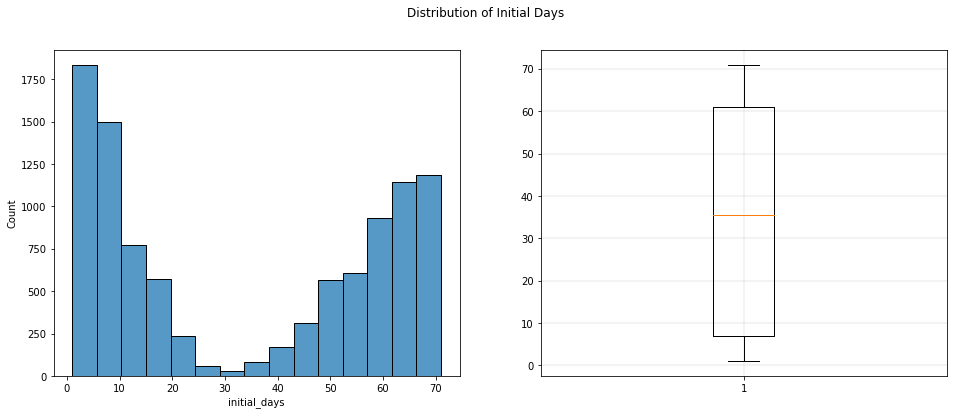

In [70]:
## target column
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.histplot(df['initial_days'])

plt.subplot(1, 2, 2)
plt.boxplot(df['initial_days'])
    
plt.grid(linewidth=0.3)
plt.suptitle('Distribution of Initial Days')
plt.show()

***Continuous Variables***

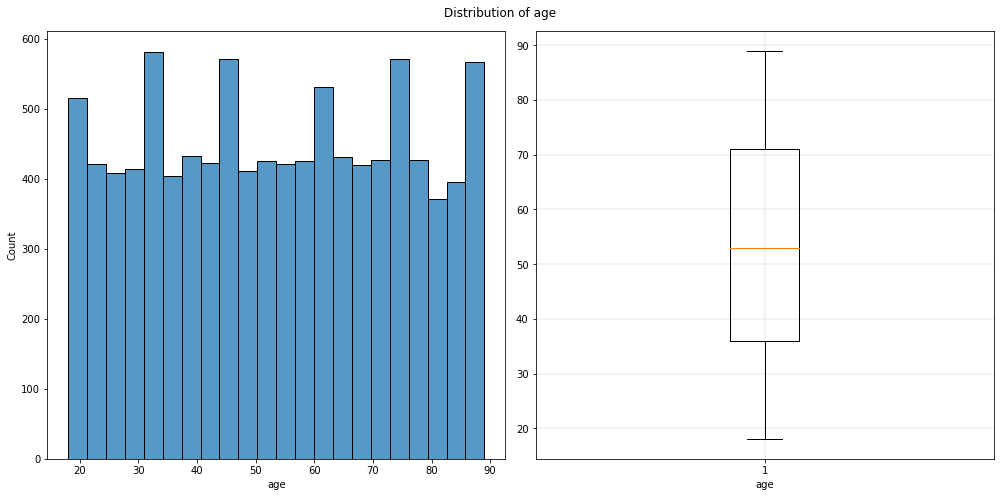

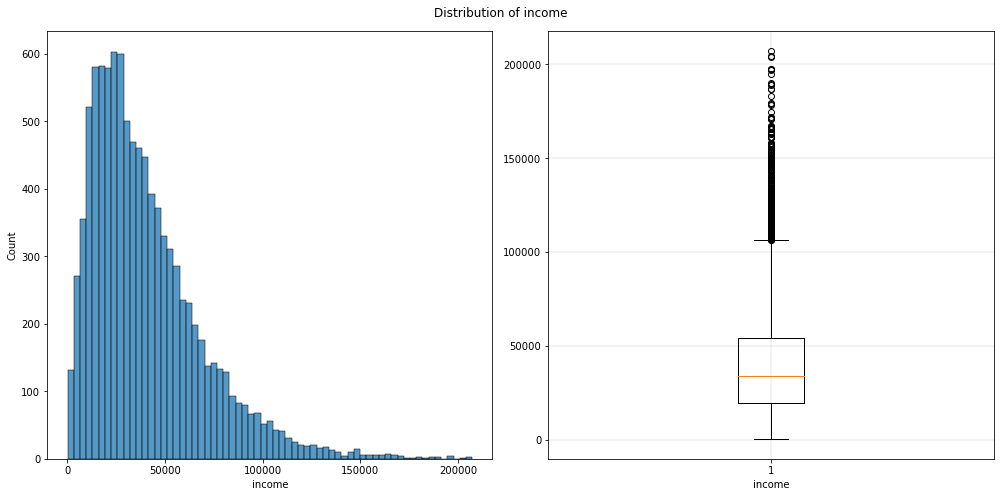

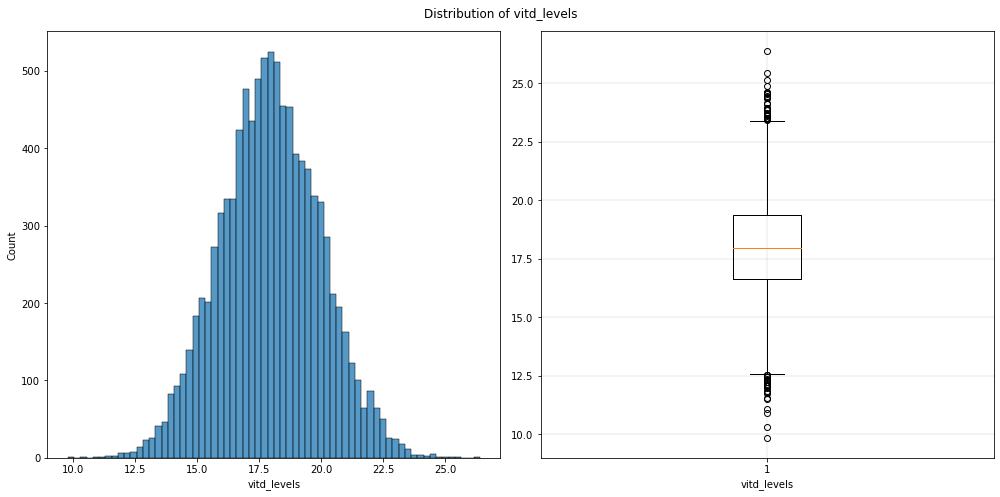

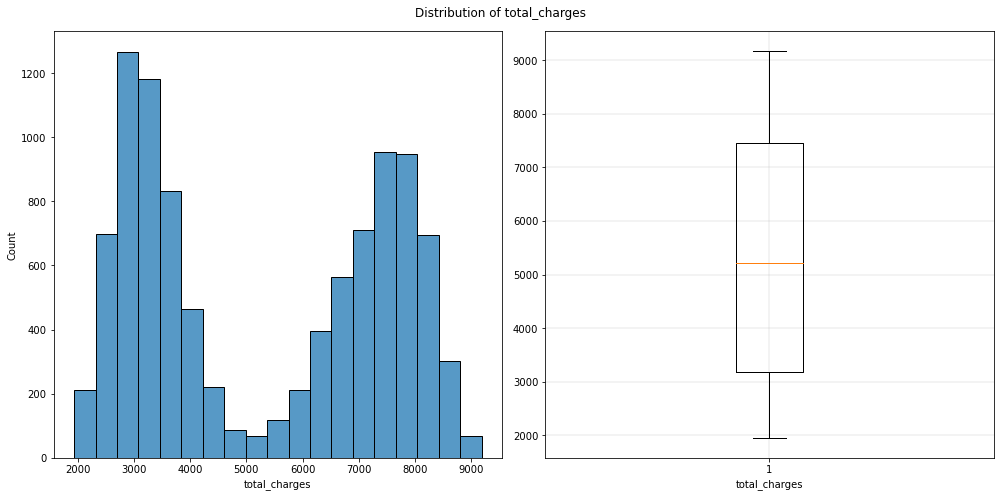

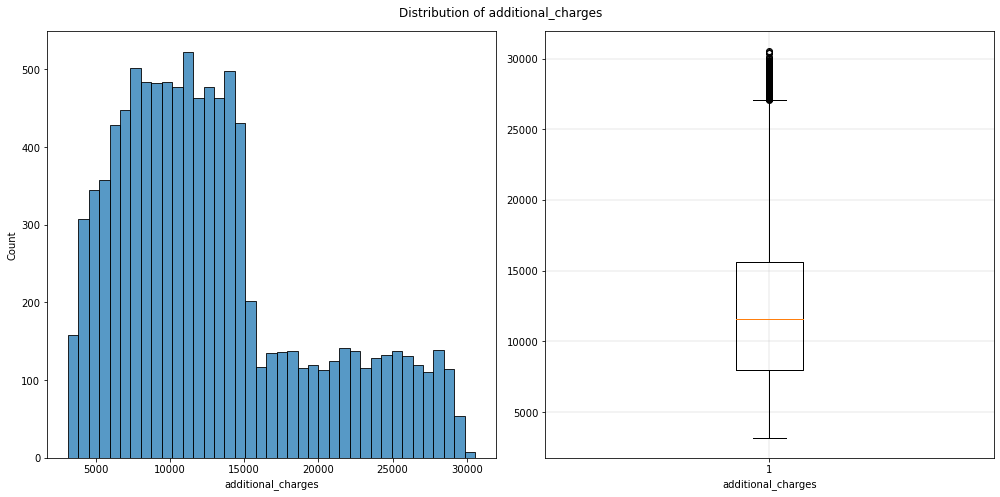

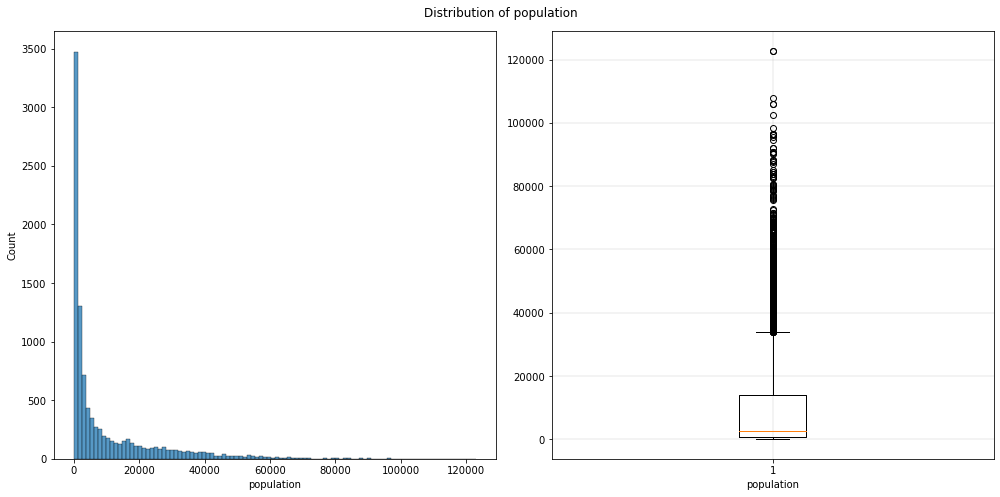

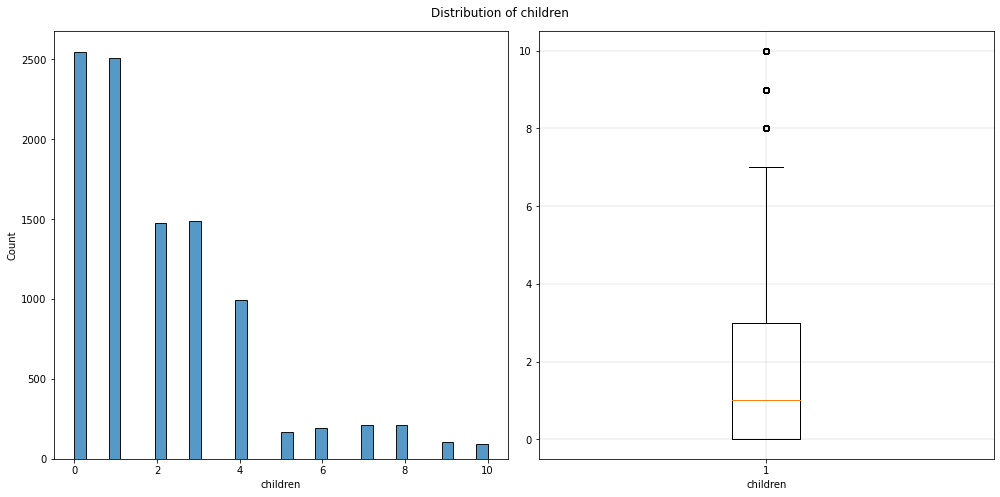

In [71]:
# distribution plot along with boxplot
for col in cont_vars:
    plt.figure(figsize=(14, 7))
    
    # hist
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col)
    
    plt.xlabel(col)
    
    # boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.xlabel(col)
     
    plt.grid(linewidth=0.3)    
    plt.suptitle(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

***Categorical Variables***

Distribution for categorical variables:


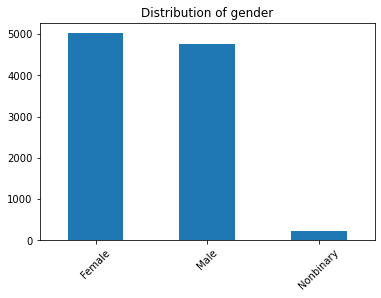

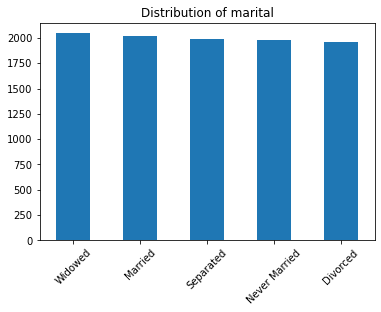

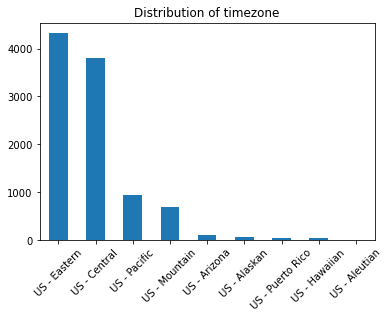

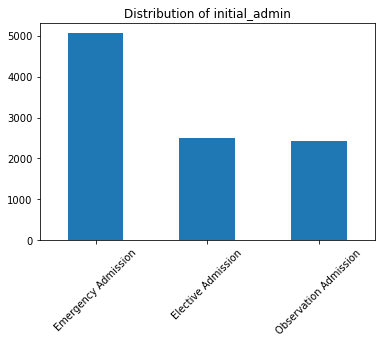

In [72]:
# distribution of categorical variables
print('Distribution for categorical variables:')
for var in cat_vars:
    df[var].value_counts().plot(kind='bar') 
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {var}')
    plt.show()

***Indicator (boolean) Variables***

In [28]:
boolean_vars

['high_blood',
 'stroke',
 'complication_risk',
 'overweight',
 'arthritis',
 'diabetes',
 'hyperlipidemia',
 'backpain',
 'anxiety',
 'allergic_rhinitis',
 'reflux_esophagitis',
 'asthma']

Frequency distribution for boolean variables:


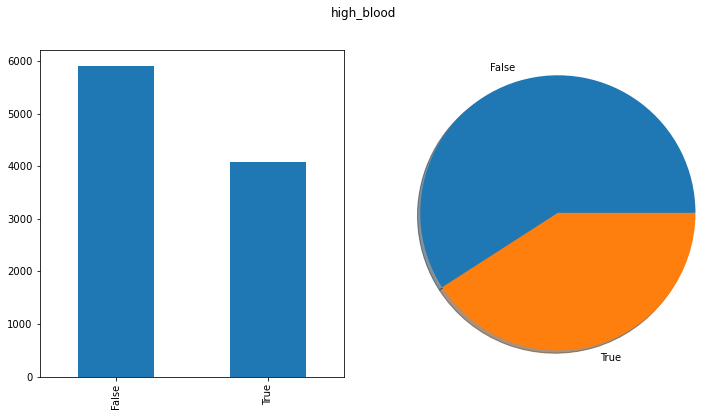

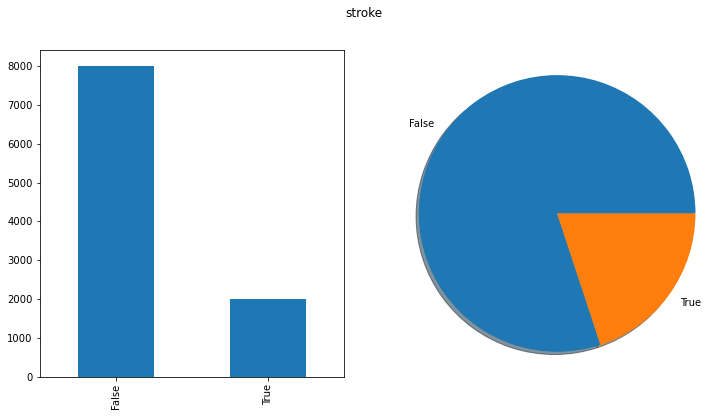

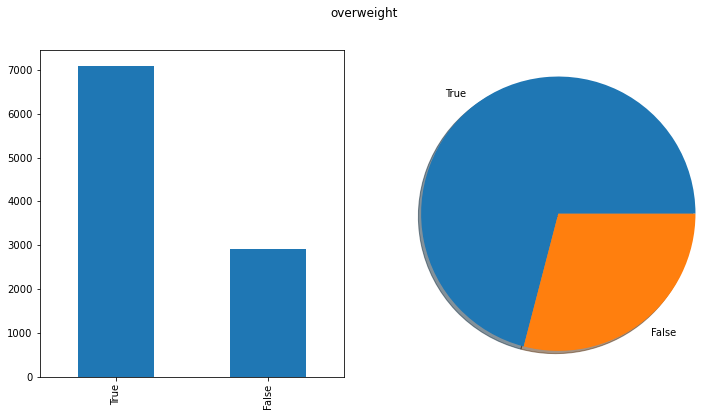

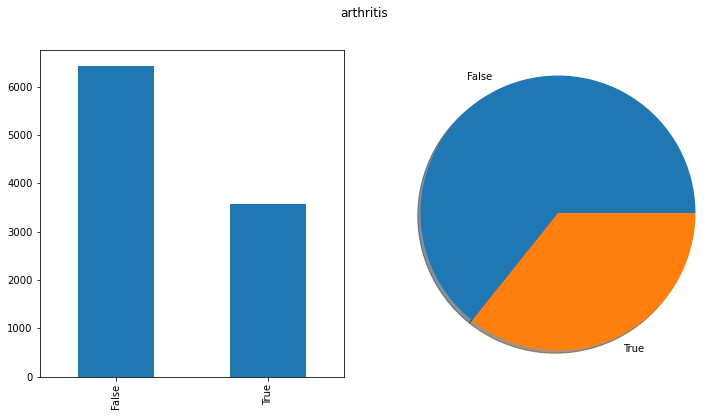

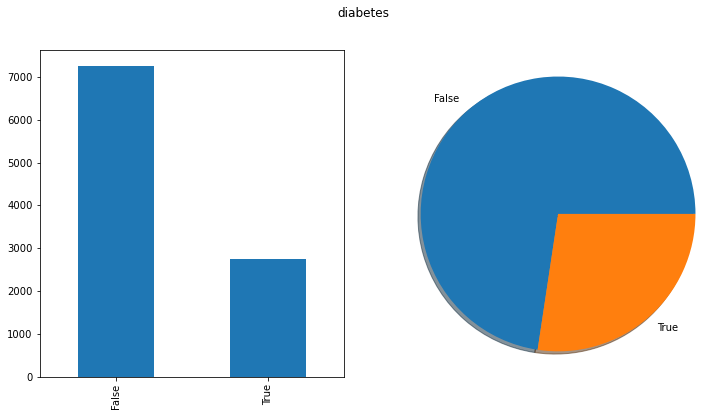

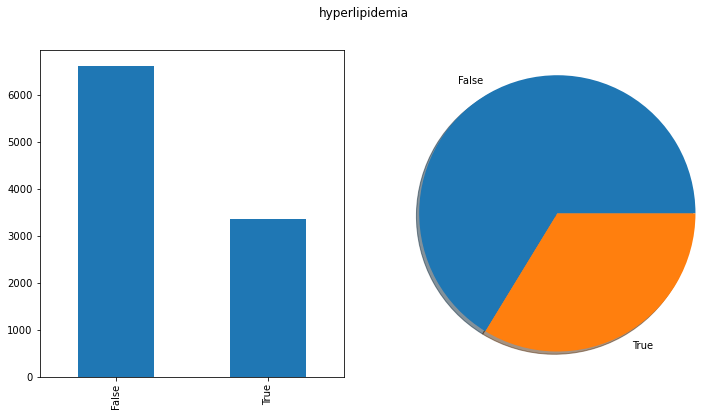

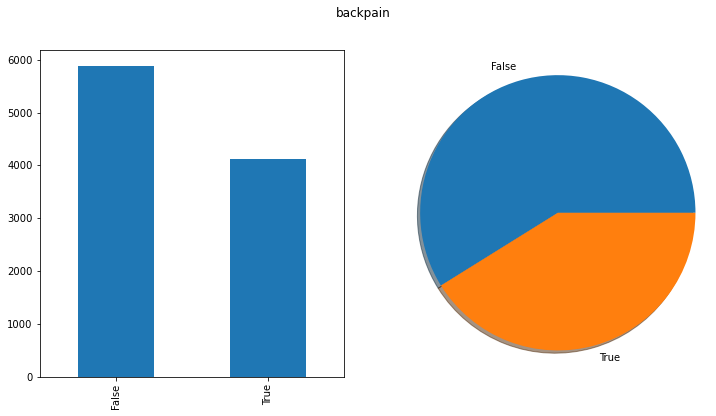

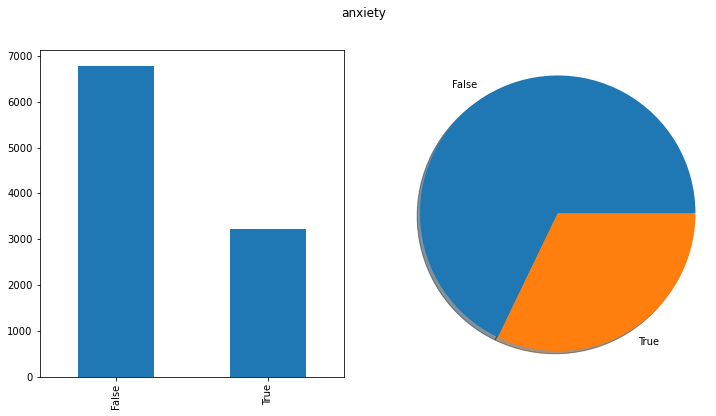

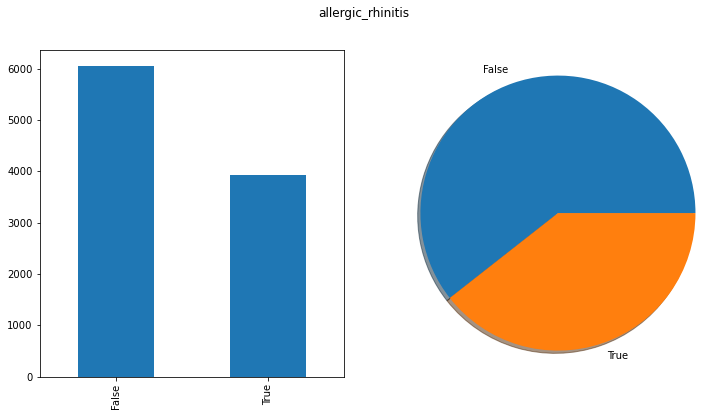

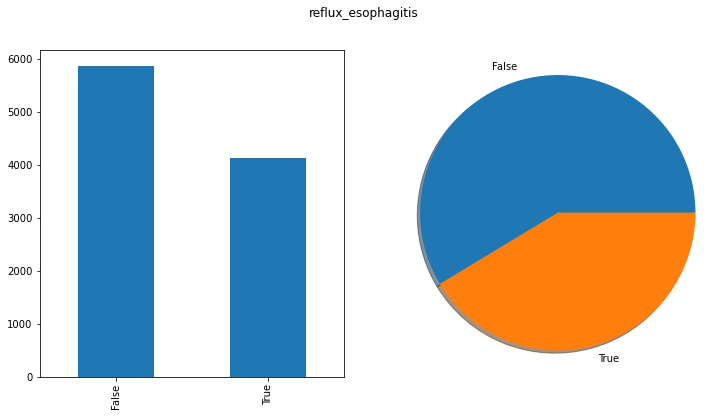

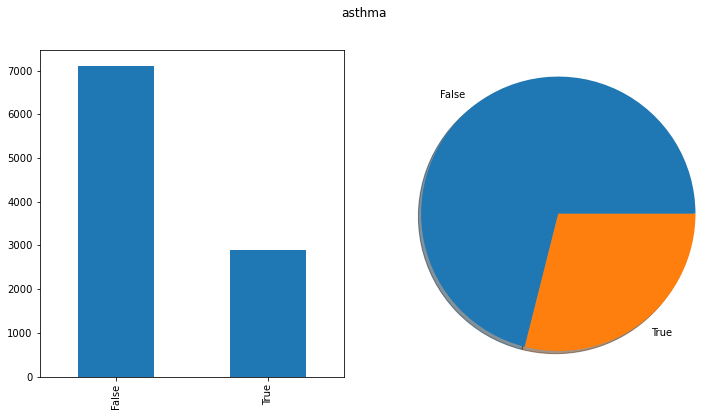

In [114]:
# Frequency distribution for boolean variables
print('Frequency distribution for boolean variables:')
for col in boolean_vars:
    plt.figure(figsize=(12,6))
#     print(f'\n{col}:')
    plt.subplot(1, 2, 1)
    df[col].value_counts().plot(kind='bar')
    
    plt.subplot(1, 2, 2)
    val_counts_dict = dict(df[col].value_counts())
    
    v = list(val_counts_dict.values())
    k = list(val_counts_dict.keys())
    plt.pie(v, labels = k, shadow=True)
    plt.axis('equal')
    plt.suptitle(col)
    plt.show()

#### Bivariate Visualizations 

***Continuous v. Continuous (target)***

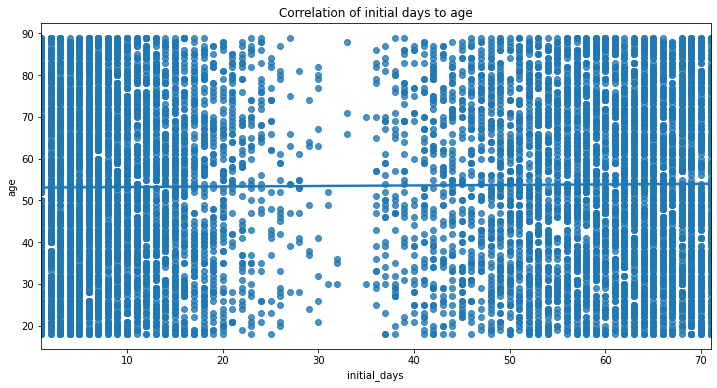

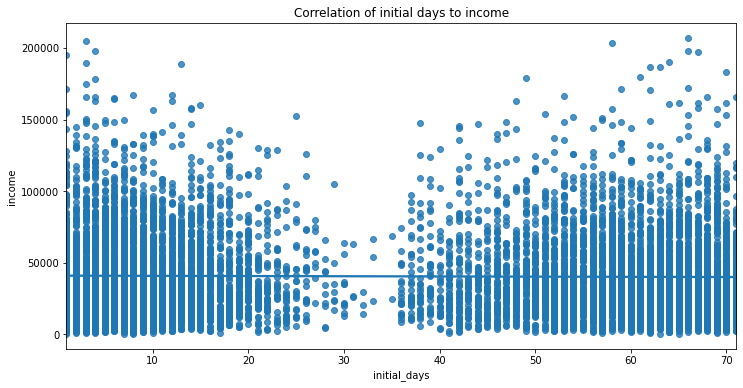

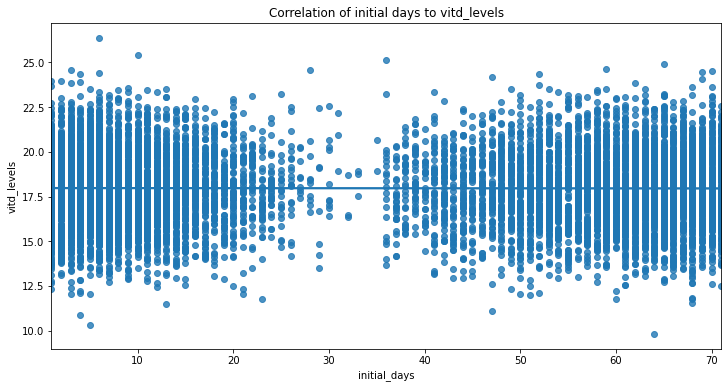

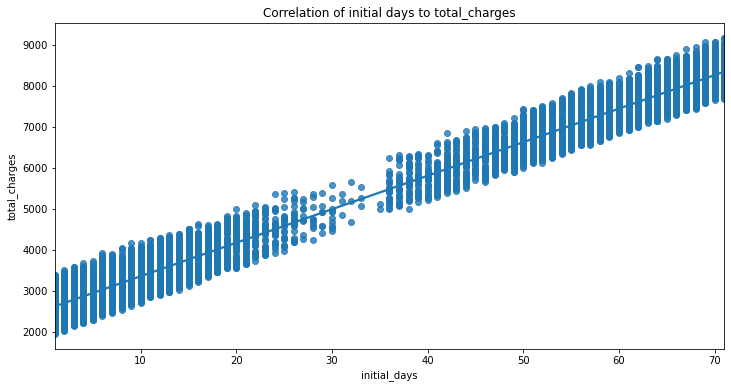

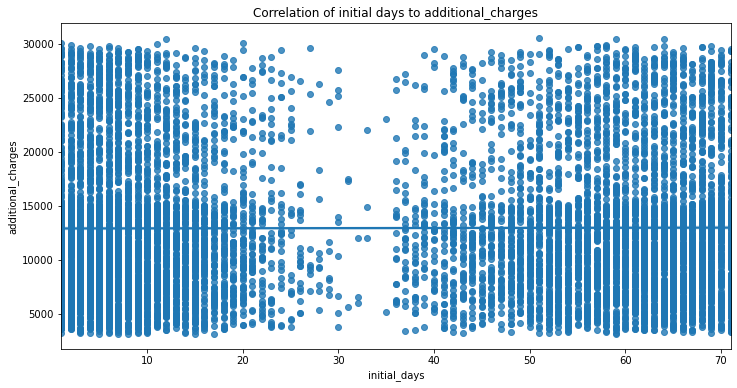

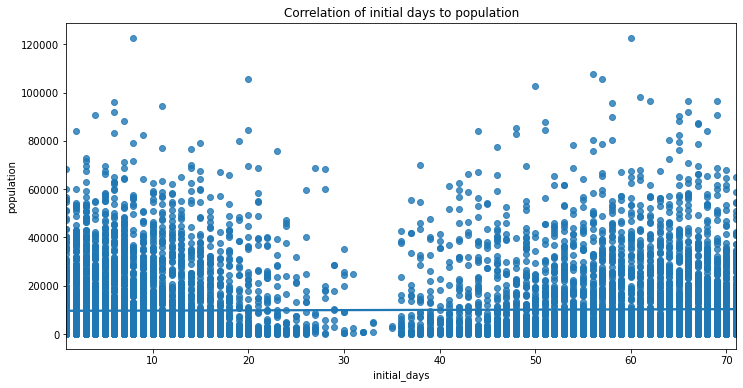

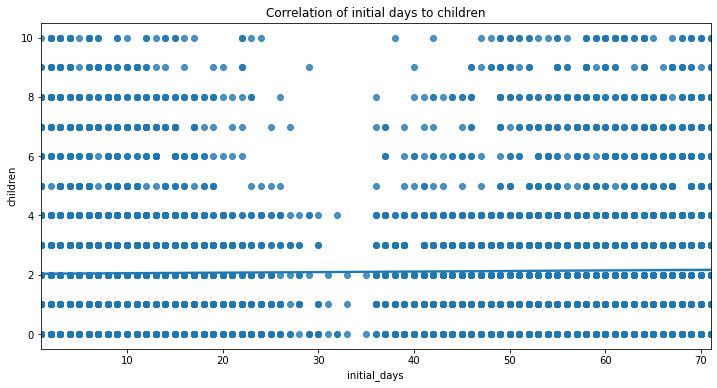

In [19]:
for i in cont_vars:
    plt.figure(figsize=(12,6))
    sns.regplot(data=df, x=df['initial_days'], y=i)
    plt.title(f'Correlation of initial days to {i}')
    plt.show()

In [20]:
cat_vars

['gender', 'marital', 'job', 'timezone', 'initial_admin']

***Continuous to Categorical Variables***

gender to initial_days


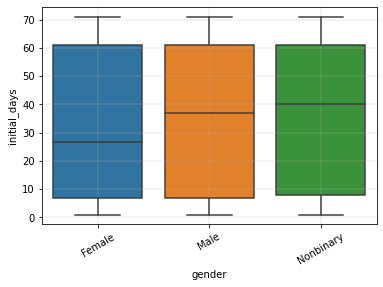

marital to initial_days


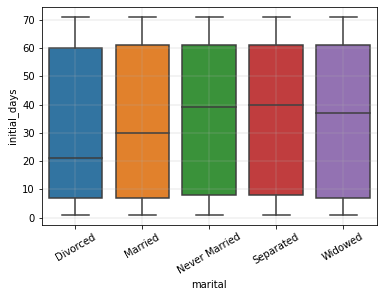

timezone to initial_days


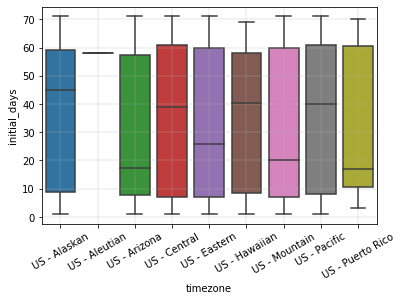

initial_admin to initial_days


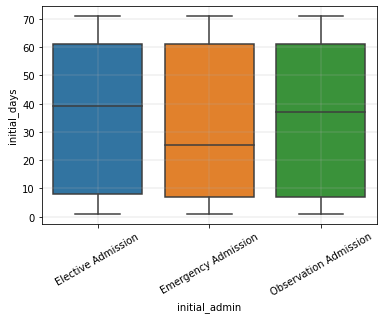

In [116]:
for i in cat_vars:
    print(f'{i} to initial_days')
    sns.boxplot(data=df, x=i, y='initial_days')
    plt.xticks(rotation=30)
    plt.grid(linewidth=0.3)
    plt.show()

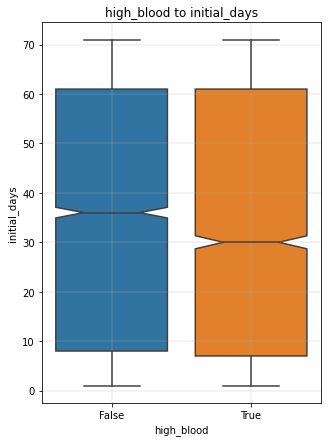

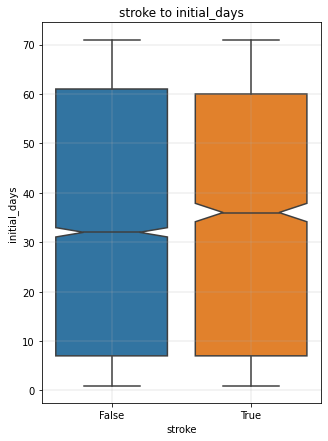

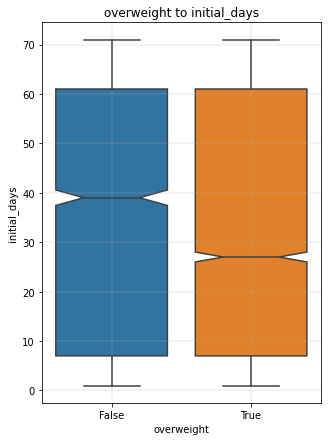

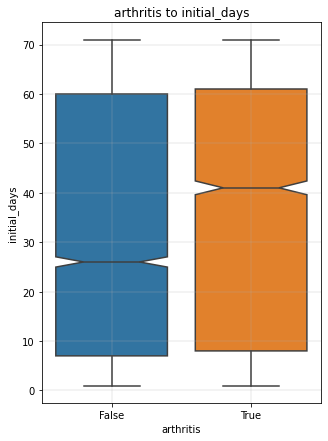

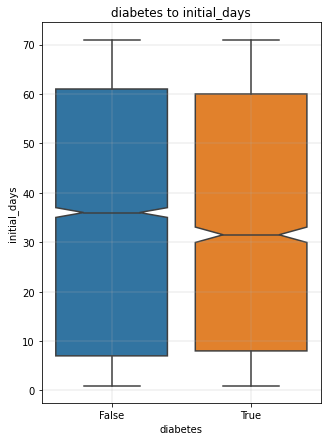

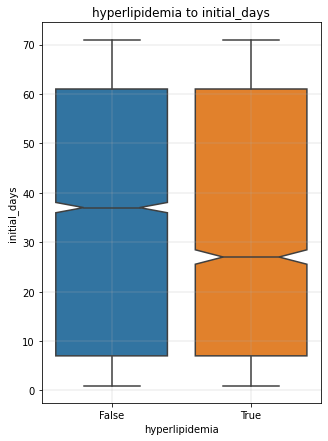

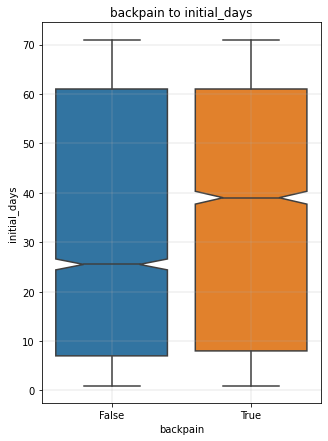

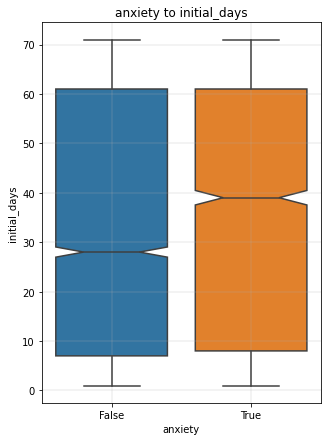

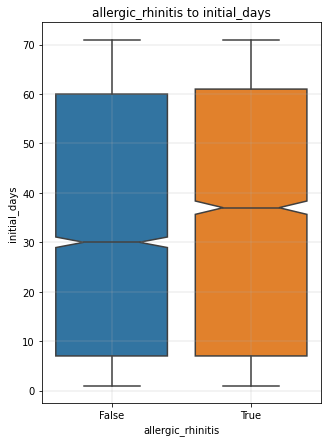

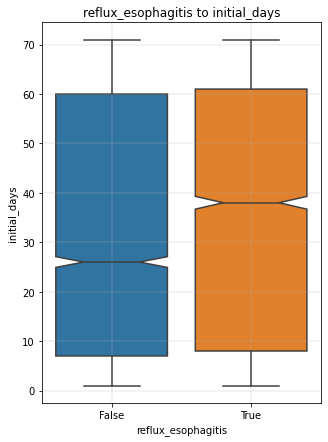

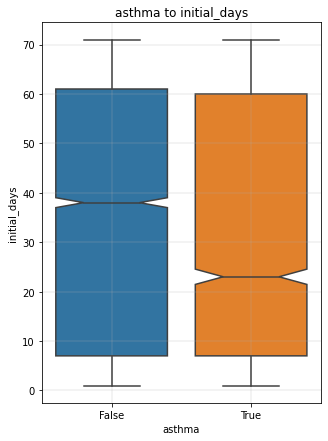

In [132]:
for i in boolean_vars:
    plt.figure(figsize=(5,7))
    sns.boxplot(x=i, y='initial_days', data=df, notch=True)
    plt.title(f'{i} to initial_days')
    plt.grid(linewidth=0.3)
    plt.show()

## C4.  Describe your data transformation goals that align with your research question and the steps used to transform the data to achieve the goals, including the annotated code.

In order to prepare the data for modeling there a few required steps. Algorithms are not built to read text so nominal categorical variables would be engineered into dummy columns. Ordinal variables can often remain the same since they tend to be ordered numbers where the higher number can equate to a higher coefficient. In this dataset specifically we do not have any applicable ordinal variables and all present discrete numeric values are nominal. In this scenario we also must prepare our nominal variables as numerical values. So columns with Yes No values will be changed to 1 0 as needed. From here, the last step for this portion would be creating dummy columns for each discrete variable that does not need order preserved (such as ordinal columns).

Numerical values, specifically continuous values should also be scaled for the model to score properly. Every numerical feature will have a different minimum and maximum, thus it is important to place them on a similar scale. For this dataframe specifically, I prefer to use `sklearn` minmax scaler which sets a column's minimum to 0 and maximum to 1. I will also only employ this on the continuous variables.

Unique identifiers such as customer_id, interaction and unique_id are removed as they have no relevance to the prediction of stay. I also chose to remove job and geographical columns like zip,  during this round. Normally I would approach this nominal category by doing heavy exploration and testing binning certains jobs into groups, zipcodes in hemispheres etc.. As of now the juice is not necessarily worth the squeeze.

In [134]:
# take a look at dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         10000 non-null  object  
 1   interaction         10000 non-null  object  
 2   unique_id           10000 non-null  object  
 3   city                10000 non-null  object  
 4   state               10000 non-null  category
 5   county              10000 non-null  object  
 6   zip                 10000 non-null  object  
 7   lat                 10000 non-null  float64 
 8   lng                 10000 non-null  float64 
 9   population          10000 non-null  int32   
 10  area                10000 non-null  object  
 11  timezone            10000 non-null  category
 12  job                 10000 non-null  object  
 13  children            10000 non-null  int32   
 14  age                 10000 non-null  int32   
 15  income              10000 non-null  

#### Kitchen Sink: Initial Model
- choose cols for training
- scale accordingly
- create dummies
- shuffle then split data

In [ ]:
# removing INCOME for ethics purposes

#### Shuffle/Split

In [167]:
train_validate, test = train_test_split(df,
                                        test_size=.2, 
                                        random_state=314,
                                        shuffle=True)

train, validate = train_test_split(train_validate,
                                   test_size=.3, 
                                   random_state=314,
                                   shuffle=True)


print(f'Train shape ---> {train.shape}')
print(f'Validate shape ---> {validate.shape}')
print(f'Test shape ---> {test.shape}')

Train shape ---> (5600, 49)
Validate shape ---> (2400, 49)
Test shape ---> (2000, 49)


In [168]:
kitchen_sink_cols = ['area'
                    ,'children'
                    ,'age'
                    ,'marital'
                    ,'gender'
                    ,'readmission'
                    ,'vitd_levels'
                    ,'doc_visits'
                    ,'full_meals_eaten'
                    ,'vitd_supplement'
                    ,'soft_drink'
                    ,'initial_admin'
                    ,'high_blood'
                    ,'stroke'
                    ,'complication_risk'
                    ,'overweight'
                    ,'arthritis'
                    ,'diabetes'
                    ,'hyperlipidemia'
                    ,'backpain'
                    ,'anxiety'
                    ,'allergic_rhinitis'
                    ,'reflux_esophagitis'
                    ,'asthma'
                    ,'services_received'
                    ,'total_charges'
                    ,'additional_charges'
                    ,'item1'
                    ,'item2'
                    ,'item3'
                    ,'item4'
                    ,'item5'
                    ,'item6'
                    ,'item7'
                    ,'item8']


X_train = train[kitchen_sink_cols]
X_validate = validate[kitchen_sink_cols]
X_test = test[kitchen_sink_cols]

y_train = train.initial_days
y_validate = validate.initial_days
y_test = test.initial_days

In [ ]:
X_train = train

In [163]:
# scale continuous values (discrete on a case by case depending on range)
to_scale = ['age'
            ,'vitd_levels'
            ,'total_charges'
            ,'additional_charges'
            ,'population']

In [ ]:
# dummify nominal
to_dummy = ['gender'
           ,'marital'
           ,'initial_admin'
           ,'services_received']

In [ ]:
# change boolean to binary
binary = ['readmission'
                  ,'high_blood'
                  ,'stroke'
                  ,'complication_risk'
                  ,'overweight'
                  ,'arthritis'
                  ,'diabetes'
                  ,'hyperlipidemia'
                  ,'backpain'
                  ,'anxiety'
                  ,'allergic_rhinitis'
                  ,'reflux_esophagitis'
                  ,'asthma']

In [ ]:
# ordinal change to ordinal numerical
# discrete values that contain order
ordinal = ['children'
          ,'doc_visits'
          ,'full_meals_eaten'
          ,'vitd_supplement'
          ,'soft_drink'
          ,'item1'
          ,'item2'
          ,'item3'
          ,'item4'
          ,'item5'
          ,'item6'
          ,'item7'
          ,'item8']

### C5.  Provide the prepared data set as a CSV file.

## Part IV: Model Comparison and Analysis

D.  Compare an initial and a reduced linear regression model by doing the following:

1.  Construct an initial multiple linear regression model from all independent variables that were identified in part C2.

2.  Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question.

3.  Provide a reduced linear regression model that follows the feature selection or model evaluation process in part D2, including a screenshot of the output for each model.






E.  Analyze the data set using your reduced linear regression model by doing the following:

1.  Explain your data analysis process by comparing the initial multiple linear regression model and reduced linear regression model, including the following element:

•   a model evaluation metric

2.  Provide the output and all calculations of the analysis you performed, including the following elements for your reduced linear regression model:

•   a residual plot

•   the model’s residual standard error

3.  Provide an executable error-free copy of the code used to support the implementation of the linear regression models using a Python or R file.


## Part V: Data Summary and Implications

F.  Summarize your findings and assumptions by doing the following:

1.  Discuss the results of your data analysis, including the following elements:

•   a regression equation for the reduced model

•   an interpretation of the coefficients of the reduced model

•   the statistical and practical significance of the reduced model

•   the limitations of the data analysis

2.  Recommend a course of action based on your results.



Part VI: Demonstration

G.  Provide a Panopto video recording that includes the presenter and a vocalized demonstration of the functionality of the code used for the analysis of the programming environment, including the following elements:

•   an identification of the version of the programming environment

•   a comparison of the initial multiple linear regression model you used and the reduced linear regression model you used in your analysis

•   an interpretation of the coefficients of the reduced model


Note: The audiovisual recording should feature you visibly presenting the material (i.e., not in voiceover or embedded video) and should simultaneously capture both you and your multimedia presentation.


Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.


To submit your recording, upload it to the Panopto drop box titled “Regression Modeling – NBM3 | D208.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.



H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.


I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.


J.  Demonstrate professional communication in the content and presentation of your submission.

## Sources
[Investopedia - Linear Relationship Definition](https://www.investopedia.com/terms/l/linearrelationship.asp)

[Residual Analysis for Independence (helpful image for visualization)](https://dev.to/ungest/independence-of-errors-a-guide-to-validating-linear-regression-assumptions-4h6b)

[Homoscedasticity - Statistics SolutionsPart IV: Model Comparison and Analysis

D.  Compare an initial and a reduced linear regression model by doing the following:

1.  Construct an initial multiple linear regression model from all independent variables that were identified in part C2.

2.  Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question.

3.  Provide a reduced linear regression model that follows the feature selection or model evaluation process in part D2, including a screenshot of the output for each model.
](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/homoscedasticity/)